#**Multi-Head Attention**
***Ngô Nguyễn Trọng Đắt***

# Introduction

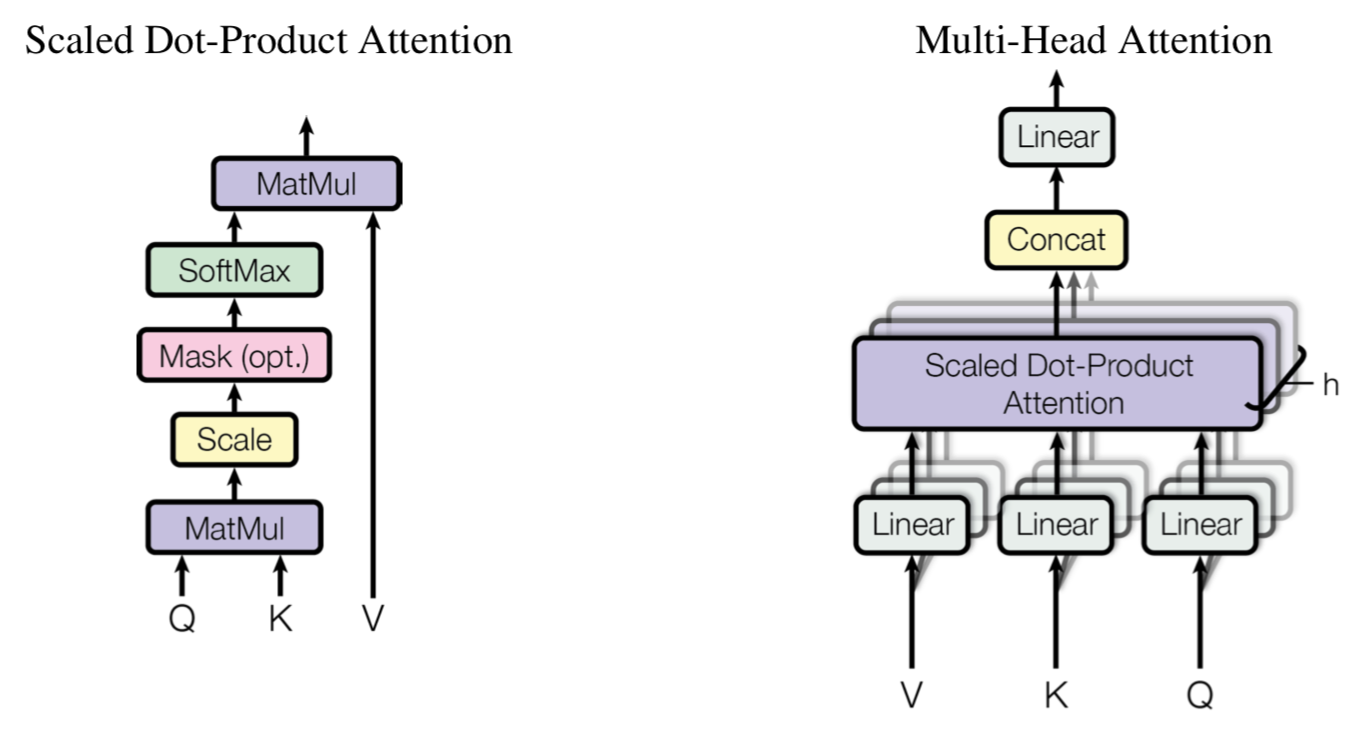

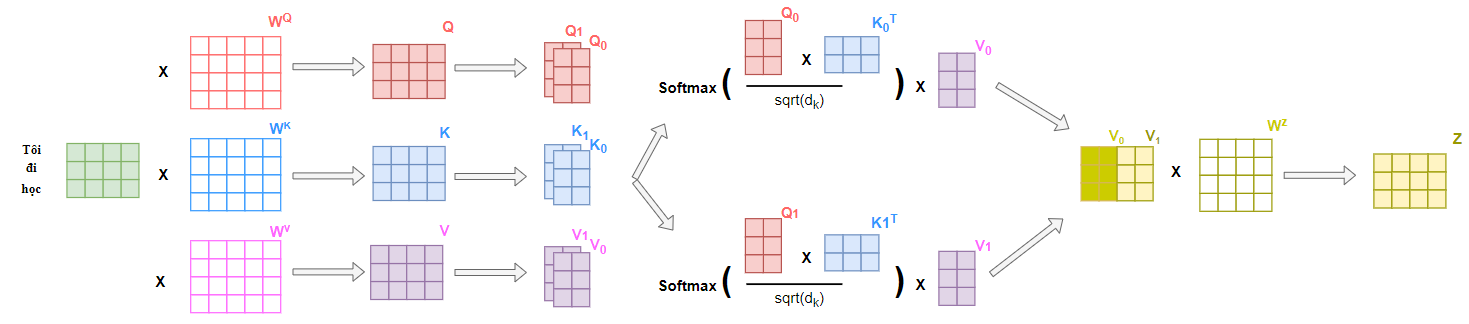

# Implement

In [26]:
import torch
import torch.nn as nn

import math

In [20]:
class BertSelfAttention(nn.Module):
      def __init__(self, config):
        super().__init__()
        assert config["hidden_size"] % config["num_of_attention_heads"] == 0, "The hidden size is not a multiple of the number of attention heads"

        self.num_attention_heads = config['num_of_attention_heads']
        self.attention_head_size = int(config['hidden_size'] / config['num_of_attention_heads'])
        self.all_head_size = self.num_attention_heads * self.attention_head_size

        self.query = nn.Linear(config['hidden_size'], self.all_head_size)
        self.key = nn.Linear(config['hidden_size'], self.all_head_size)
        self.value = nn.Linear(config['hidden_size'], self.all_head_size)

        self.dense = nn.Linear(config['hidden_size'], config['hidden_size'])

      def transpose_for_scores(self, x):
        new_x_shape = x.size()[:-1] + (self.num_attention_heads, self.attention_head_size)
        x = x.view(*new_x_shape)
        return x.permute(0, 2, 1, 3)

      def forward(self, hidden_states):
        mixed_query_layer = self.query(hidden_states)                             # [Batch_size x Seq_length x Hidden_size]
        mixed_key_layer = self.key(hidden_states)                                 # [Batch_size x Seq_length x Hidden_size]
        mixed_value_layer = self.value(hidden_states)                             # [Batch_size x Seq_length x Hidden_size]
        
        query_layer = self.transpose_for_scores(mixed_query_layer)                # [Batch_size x Num_of_heads x Seq_length x Head_size]
        key_layer = self.transpose_for_scores(mixed_key_layer)                    # [Batch_size x Num_of_heads x Seq_length x Head_size]
        value_layer = self.transpose_for_scores(mixed_value_layer)                # [Batch_size x Num_of_heads x Seq_length x Head_size]

        
        attention_scores = torch.matmul(query_layer, key_layer.transpose(-1, -2)) # [Batch_size x Num_of_heads x Seq_length x Seq_length]
        attention_scores = attention_scores / math.sqrt(self.attention_head_size) # [Batch_size x Num_of_heads x Seq_length x Seq_length]
        attention_probs = nn.Softmax(dim=-1)(attention_scores)                    # [Batch_size x Num_of_heads x Seq_length x Seq_length]
        context_layer = torch.matmul(attention_probs, value_layer)                # [Batch_size x Num_of_heads x Seq_length x Head_size]

        context_layer = context_layer.permute(0, 2, 1, 3).contiguous()            # [Batch_size x Seq_length x Num_of_heads x Head_size]
        new_context_layer_shape = context_layer.size()[:-2] + (self.all_head_size,) # [Batch_size x Seq_length x Hidden_size]
        context_layer = context_layer.view(*new_context_layer_shape)              # [Batch_size x Seq_length x Hidden_size]
        
        output =  self.dense(context_layer)
        
        return output

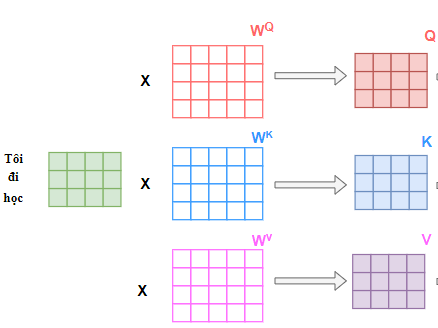

        mixed_query_layer = self.query(hidden_states)
        mixed_key_layer = self.key(hidden_states)
        mixed_value_layer = self.value(hidden_states)  

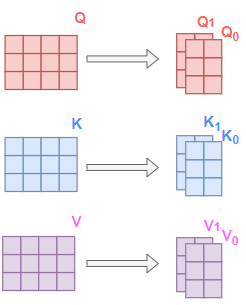

        query_layer = self.transpose_for_scores(mixed_query_layer)
        key_layer = self.transpose_for_scores(mixed_key_layer)
        value_layer = self.transpose_for_scores(mixed_value_layer)

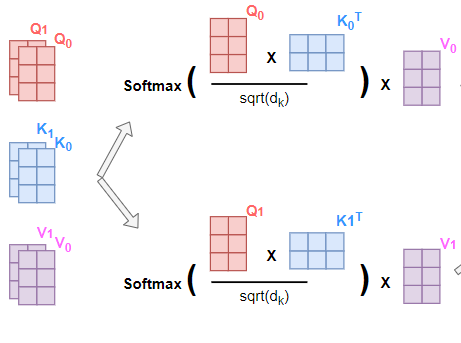

        attention_scores = torch.matmul(query_layer, key_layer.transpose(-1, -2))
        attention_scores = attention_scores / math.sqrt(self.attention_head_size)
        attention_probs = nn.Softmax(dim=-1)(attention_scores)
        context_layer = torch.matmul(attention_probs, value_layer)

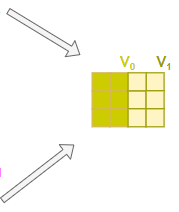

        context_layer = context_layer.permute(0, 2, 1, 3).contiguous()
        new_context_layer_shape = context_layer.size()[:-2] + (self.all_head_size,)
        context_layer = context_layer.view(*new_context_layer_shape)

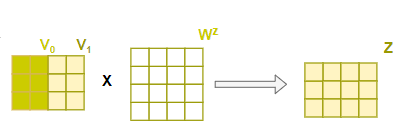
 
    output =  self.dense(context_layer)

Khởi tạo model self_Attention

In [21]:
config = {
    "num_of_attention_heads": 2,
    "hidden_size": 4
}

In [22]:
selfattn = BertSelfAttention(config)
print(selfattn)

BertSelfAttention(
  (query): Linear(in_features=4, out_features=4, bias=True)
  (key): Linear(in_features=4, out_features=4, bias=True)
  (value): Linear(in_features=4, out_features=4, bias=True)
  (dense): Linear(in_features=4, out_features=4, bias=True)
)


Khởi tạo ngẫu nhiên embedding đầu vào

In [23]:
embed_rand = torch.rand((1,3,4))
print(f"Embed Shape: {embed_rand.shape}")
print(f"Embed Values:\n{embed_rand}")

Embed Shape: torch.Size([1, 3, 4])
Embed Values:
tensor([[[0.5634, 0.7287, 0.0795, 0.9081],
         [0.0285, 0.2526, 0.9199, 0.8607],
         [0.8747, 0.9667, 0.7868, 0.9651]]])


Forward input embedding với SelfAttention

In [27]:
output = selfattn(embed_rand)
print(f"Output Shape: {output.shape}")
print(f"Output Values:\n{output}")

Output Shape: torch.Size([1, 3, 4])
Output Values:
tensor([[[-0.1502, -0.2663,  0.1645,  0.4337],
         [-0.1510, -0.2689,  0.1662,  0.4360],
         [-0.1496, -0.2648,  0.1635,  0.4328]]], grad_fn=<AddBackward0>)
